# Relavance between Features 

In [1]:
import numpy as np
import pandas as pd

In [2]:
als = pd.read_csv('als_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
als.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,Chloride_median,Chloride_min,Chloride_range,Creatinine_max,Creatinine_median,Creatinine_min,Creatinine_range,Gender_mean,Glucose_max,Glucose_median,Glucose_min,Glucose_range,hands_max,hands_median,hands_min,hands_range,Hematocrit_max,Hematocrit_median,Hematocrit_min,Hematocrit_range,Hemoglobin_max,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,108.0,103.0,0.020906,79.56,79.56,70.72,0.030801,1,7.4370,4.4955,4.2180,0.011216,8,7.5,6,0.005291,44.6,43.15,40.7,0.013589,156.0,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,102.0,100.0,0.013937,61.88,53.04,44.20,0.030801,1,6.7710,4.9950,4.0515,0.004738,8,6.0,6,0.003591,41.9,39.60,37.7,0.007317,138.0,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,106.0,104.0,0.007143,88.40,79.56,70.72,0.031571,2,5.6610,5.1060,4.2180,0.002577,4,1.0,0,0.007143,49.1,46.20,44.0,0.009107,161.0,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,107.0,106.0,0.007481,70.72,61.88,53.04,0.044090,2,5.1060,4.7730,4.6620,0.001107,6,5.5,4,0.004988,46.3,43.00,41.7,0.011471,154.0,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.

In [6]:
als = als.drop(['ID', 'SubjectID', 'trunk_max', 'trunk_median', 'trunk_min', 'trunk_range'], axis=1)

In [8]:
columns = []
for col in als.columns:
    columns.append(col)
    
columns.remove('ALSFRS_Total_range')    
print(columns)

['Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min', 'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max', 'ALSFRS_Total_median', 'ALSFRS_Total_min', 'ALT.SGPT._max', 'ALT.SGPT._median', 'ALT.SGPT._min', 'ALT.SGPT._range', 'AST.SGOT._max', 'AST.SGOT._median', 'AST.SGOT._min', 'AST.SGOT._range', 'Bicarbonate_max', 'Bicarbonate_median', 'Bicarbonate_min', 'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._max', 'Blood.Urea.Nitrogen..BUN._median', 'Blood.Urea.Nitrogen..BUN._min', 'Blood.Urea.Nitrogen..BUN._range', 'bp_diastolic_max', 'bp_diastolic_median', 'bp_diastolic_min', 'bp_diastolic_range', 'bp_systolic_max', 'bp_systolic_median', 'bp_systolic_min', 'bp_systolic_range', 'Calcium_max', 'Calcium_median', 'Calcium_min', 'Calcium_range', 'Chloride_max', 'Chloride_median', 'Chloride_min', 'Chloride_range', 'Creatinine_max', 'Creatinine_median', 'Creatinine_min', 'Creatinine_range', 'Gender_mean', 'Glucose_max', 'Glucose_median', 'Glucose_min', 'Glucose_range', 'hands_max', 'hands_me

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(als) 

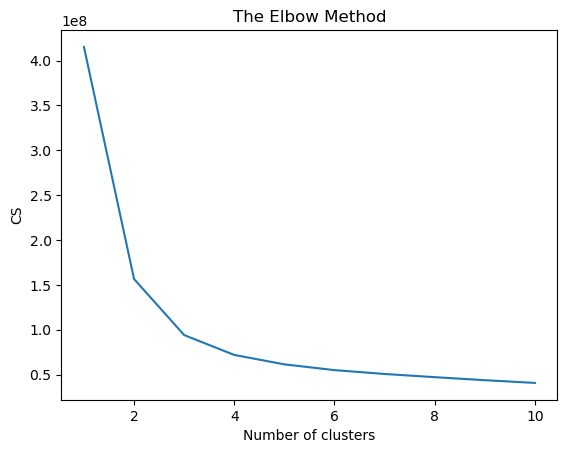

In [11]:
# Importing Kmeans to identify clusters of data objects in the dataset
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# cs is the sum of squared distances of samples to their closest cluster center
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(als)
    cs.append(kmeans.inertia_)
# plotting number of clusters
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

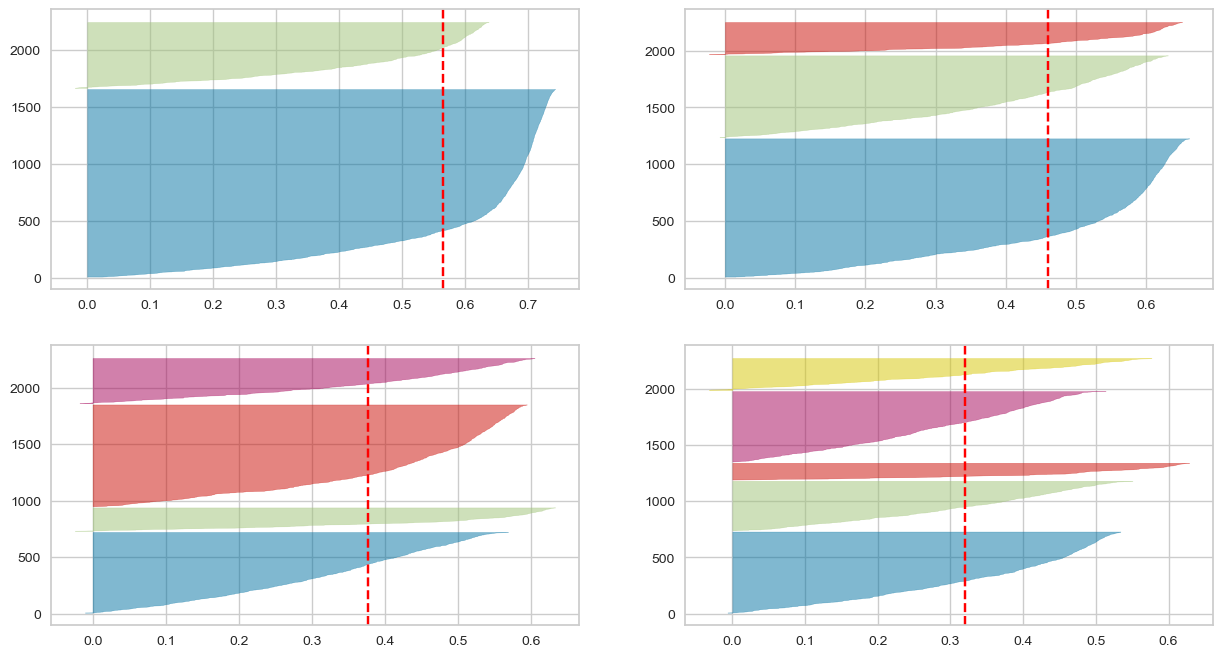

In [12]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    # Create SilhouetteVisualizer instance with KMeans instance & Fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(als) 

Based off of the sillouhette plotted of the silhouette score versus the number of clusters, the optimal number of clusters for K-means chosen was 2 since the the thickness in the clusters are the most uniform in that plot than the others. The average silhouette score is also closest to one when there were two clusters. 

In [13]:
# Applying kmeans algorithm 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(als)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [15]:
from sklearn.decomposition import PCA

# Fitting a PCA transformation 
principal=PCA(n_components=2)
principal.fit(scaled)
pc = principal.transform(scaled)

Text(0, 0.5, 'PC2')

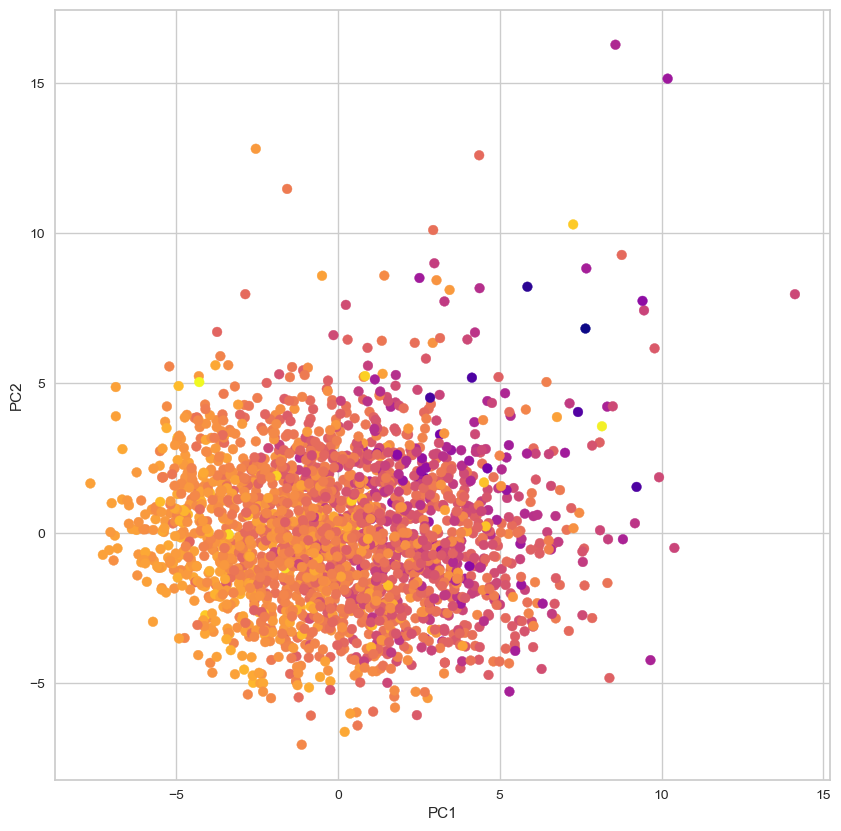

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(pc[:,0],pc[:,1],c=als['ALSFRS_slope'],cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')

In this data analysis regarding ALS patients, the data was prepped by removing unneccessary features from the dataset. A standard scaler was then applied to the data to remove the mean and to scale each feature/variable to unit variance. Clusters of data objects in the dataset were then identified with the elbow method to see the amount of clsuters best fit the data. A Silhouette visualizer was created instance with KMeans, the silhouette average was then seen with 2 clusters which lead me to choose 2 for my k value. The K means algorith was applied and after Fitting a PCA transformation and plotting the data, it was evident from the scatter plot that the variance was very low. The clusters practically sitting on one another. 
The data analysis demonstrates with its clusters from the visualization that there is a very low varience among the features and targeted feature; ALSFRS_slope. 